## Relational Plot
### Seaborn.linrplot
seaborn.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)
Draw a line plot with possibility of several semantic groupings.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

See the tutorial for more information.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent “numeric” or “categorical” data. In particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular “ticks” with values that may or may not exist in the data. This behavior can be controlled through various parameters, as described and illustrated below.

By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.

Parameters
x, ynames of variables in data or vector data, optional
Input data variables; must be numeric. Can pass data directly or reference columns in data.

huename of variables in data or vector data, optional
Grouping variable that will produce lines with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

sizename of variables in data or vector data, optional
Grouping variable that will produce lines with different widths. Can be either categorical or numeric, although size mapping will behave differently in latter case.

stylename of variables in data or vector data, optional
Grouping variable that will produce lines with different dashes and/or markers. Can have a numeric dtype but will always be treated as categorical.

dataDataFrame
Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

hue_orderlist, optional
Specified order for the appearance of the hue variable levels, otherwise they are determined from the data. Not relevant when the hue variable is numeric.

hue_normtuple or Normalize object, optional
Normalization in data units for colormap applied to the hue variable when it is numeric. Not relevant if it is categorical.

sizeslist, dict, or tuple, optional
An object that determines how sizes are chosen when size is used. It can always be a list of size values or a dict mapping levels of the size variable to sizes. When size is numeric, it can also be a tuple specifying the minimum and maximum size to use such that other values are normalized within this range.

size_orderlist, optional
Specified order for appearance of the size variable levels, otherwise they are determined from the data. Not relevant when the size variable is numeric.

size_normtuple or Normalize object, optional
Normalization in data units for scaling plot objects when the size variable is numeric.

dashesboolean, list, or dictionary, optional
Object determining how to draw the lines for different levels of the style variable. Setting to True will use default dash codes, or you can pass a list of dash codes or a dictionary mapping levels of the style variable to dash codes. Setting to False will use solid lines for all subsets. Dashes are specified as in matplotlib: a tuple of (segment, gap) lengths, or an empty string to draw a solid line.

markersboolean, list, or dictionary, optional
Object determining how to draw the markers for different levels of the style variable. Setting to True will use default markers, or you can pass a list of markers or a dictionary mapping levels of the style variable to markers. Setting to False will draw marker-less lines. Markers are specified as in matplotlib.

style_orderlist, optional
Specified order for appearance of the style variable levels otherwise they are determined from the data. Not relevant when the style variable is numeric.

units{long_form_var}
Grouping variable identifying sampling units. When used, a separate line will be drawn for each unit with appropriate semantics, but no legend entry will be added. Useful for showing distribution of experimental replicates when exact identities are not needed.

estimatorname of pandas method or callable or None, optional
Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn.

ciint or “sd” or None, optional
Size of the confidence interval to draw when aggregating with an estimator. “sd” means to draw the standard deviation of the data. Setting to None will skip bootstrapping.

n_bootint, optional
Number of bootstraps to use for computing the confidence interval.

seedint, numpy.random.Generator, or numpy.random.RandomState, optional
Seed or random number generator for reproducible bootstrapping.

sortboolean, optional
If True, the data will be sorted by the x and y variables, otherwise lines will connect points in the order they appear in the dataset.

err_style“band” or “bars”, optional
Whether to draw the confidence intervals with translucent error bands or discrete error bars.

err_kwsdict of keyword arguments
Additional paramters to control the aesthetics of the error bars. The kwargs are passed either to matplotlib.axes.Axes.fill_between() or matplotlib.axes.Axes.errorbar(), depending on err_style.

legend“brief”, “full”, or False, optional
How to draw the legend. If “brief”, numeric hue and size variables will be represented with a sample of evenly spaced values. If “full”, every group will get an entry in the legend. If False, no legend data is added and no legend is drawn.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

kwargskey, value mappings
Other keyword arguments are passed down to matplotlib.axes.Axes.plot().

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

Examples

Draw a single line plot with error bands showing a confidence interval:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


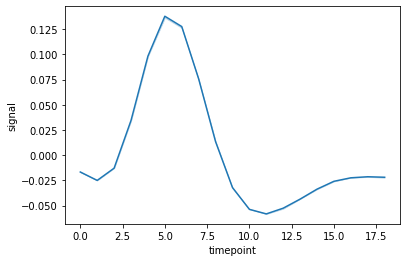

In [5]:
sns.lineplot(x='timepoint', y='signal',ci=1,data=fmri)
plt.show()

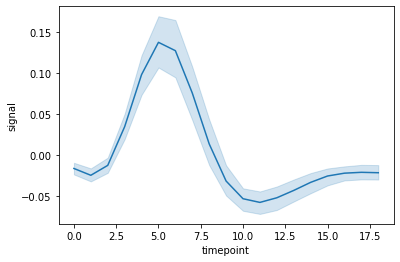

In [42]:
sns.lineplot(x='timepoint', y='signal',data=fmri)
plt.show()

Group by another variable and show the groups with different colors:

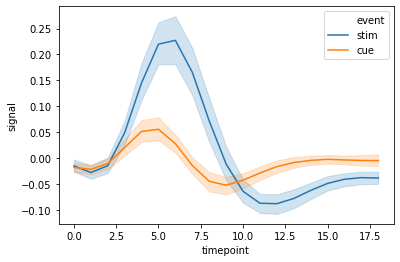

In [4]:
sns.lineplot(x='timepoint', y='signal', hue='event', data=fmri)
plt.show()

Show the grouping variable with both color and line dashing:

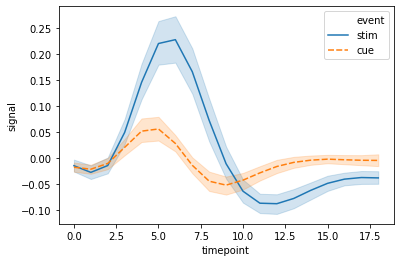

In [5]:
sns.lineplot(x='timepoint', y='signal', hue='event', style='event', data= fmri)
plt.show()

Use color and line dashing to represent two different grouping variables:

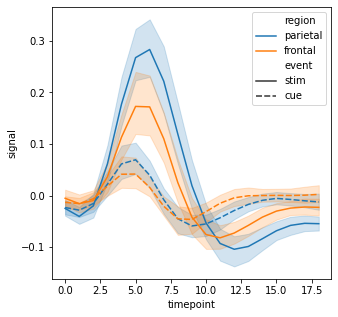

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(x='timepoint', y='signal', hue='region', style='event', data=fmri)
plt.show()

Use markers instead of the dashes to identify groups:

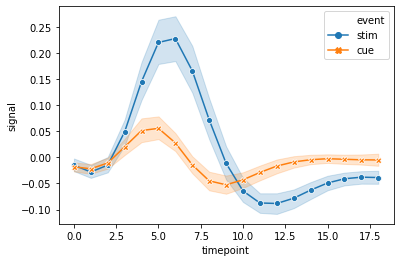

In [8]:
sns.lineplot(x='timepoint', y='signal', hue='event', style='event', dashes=False, markers=True, data=fmri)
plt.show()

Show error bars instead of error bands and plot the standard error:

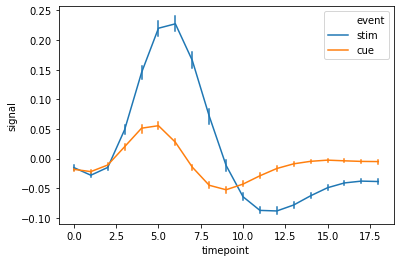

In [15]:
sns.lineplot(x='timepoint', y='signal', hue='event', err_style='bars',ci=43, data=fmri)
plt.show()

Show experimental replicates instead of aggregating:

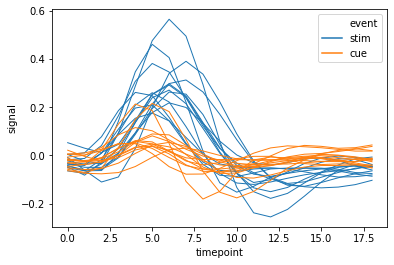

In [21]:
sns.lineplot(x='timepoint', y='signal', hue='event', units='subject'
             ,lw=1, estimator=None, data=fmri.query("region!='frontal'"))
plt.show()

Use a quantitative color mapping:

In [22]:
dots = sns.load_dataset('dots')
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


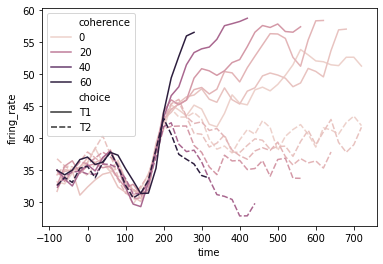

In [24]:
sns.lineplot(x='time', y='firing_rate', hue='coherence',style='choice', data=dots.query("align=='dots'"))
plt.show()

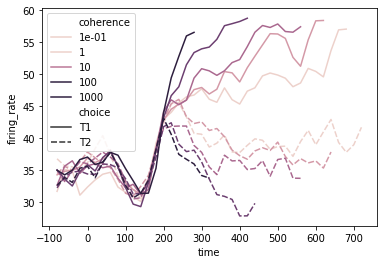

In [29]:
#
#Use a different normalization for the colormap:
from matplotlib.colors import LogNorm
ax = sns.lineplot(x="time", y="firing_rate",
                  hue="coherence", style="choice",
                  hue_norm=LogNorm(), data=dots.query("align=='dots'"))

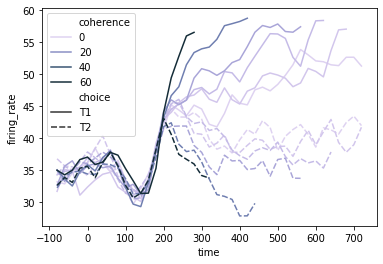

In [30]:
###Use a different color palette:

ax = sns.lineplot(x="time", y="firing_rate",
                  hue="coherence", style="choice",
                  palette="ch:2.5,.25", data=dots.query("align=='dots'"))

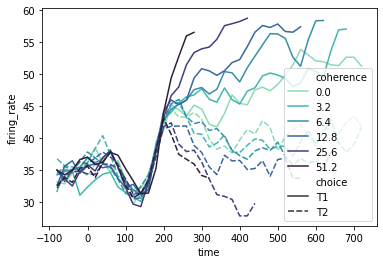

In [32]:
# Use specific color values, treating the hue variable as categorical:

palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(x="time", y="firing_rate",
                  hue="coherence", style="choice",
                  palette=palette, data=dots.query("align=='dots'"))

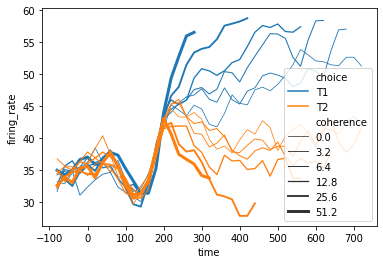

In [34]:
### Change the width of the lines with a quantitative variable:

ax = sns.lineplot(x="time", y="firing_rate",
                  size="coherence", hue="choice",
                  legend="full", data=dots.query("align=='dots'"))

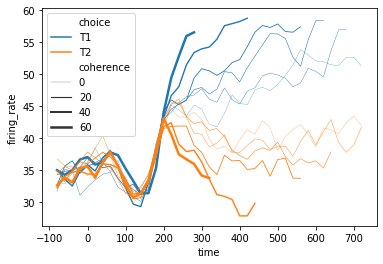

In [37]:
#Change the range of line widths used to normalize the size variable:

ax = sns.lineplot(x="time", y="firing_rate",
                  size="coherence", hue="choice",
                  sizes=(.25, 2.5), data=dots.query("align=='dots'"))

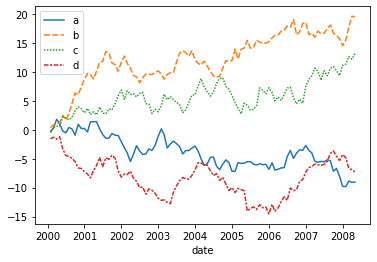

In [36]:
#Plot from a wide-form DataFrame:

import numpy as np, pandas as pd; plt.close("all")
index = pd.date_range("1 1 2000", periods=100,
                      freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
ax = sns.lineplot(data=wide_df)

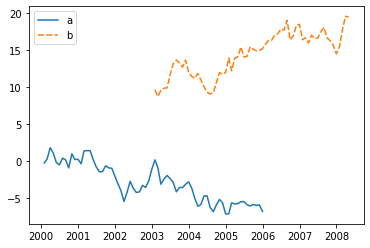

In [38]:
#Plot from a list of Series:

list_data = [wide_df.loc[:"2005", "a"], wide_df.loc["2003":, "b"]]
ax = sns.lineplot(data=list_data)

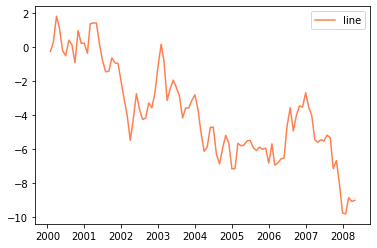

In [39]:
ax = sns.lineplot(data=wide_df["a"], color="coral", label="line")